# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [14]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io

url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
response = requests.get(url)

print(response.status_code)
print(response.text)

# codigo 200 significa que todo bien con la carga de la pagina 

200
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-cont

In [15]:
import pandas as pd
html = io.StringIO(response.text) #esto es para transformar a PAndas
tables = pd.read_html(html)

print(f'Nro de Tablas: {len(tables)}') #nro de tablas en la pag del url que utilizamos



Nro de Tablas: 27


In [17]:
df = tables[0]
df.drop(columns=["Ref."],axis=0,inplace=True)
df.head()




,Rank,Song,Artist(s),Streams (billions),Release date
0,1,"""Blinding Lights""",The Weeknd,4.898,29 November 2019
1,2,"""Shape of You""",Ed Sheeran,4.423,6 January 2017
2,3,"""Starboy""",The Weeknd and Daft Punk,3.957,21 September 2016
3,4,"""Someone You Loved""",Lewis Capaldi,3.948,8 November 2018
4,5,"""As It Was""",Harry Styles,3.937,1 April 2022


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                101 non-null    object
 1   Song                101 non-null    object
 2   Artist(s)           101 non-null    object
 3   Streams (billions)  101 non-null    object
 4   Release date        101 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB


In [25]:

df.drop(df.tail(1).index,inplace=True)
#transformar streams de objetos a numeros y la fecha a datetime 64
df['Streams (billions)'] = df['Streams (billions)'].astype(float)
df['Release date'] = pd.to_datetime(df['Release date'], errors="coerce")
df['Rank'] = df['Rank'].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                95 non-null     int64         
 1   Song                95 non-null     object        
 2   Artist(s)           95 non-null     object        
 3   Streams (billions)  95 non-null     float64       
 4   Release date        95 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.8+ KB


In [26]:
conn = sqlite3.connect("spotify_canciones_mas_escuchadas.db")
df.to_sql("mas_reproducidas",conn,if_exists="replace",index=False)


95

In [27]:
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM mas_reproducidas")
print(cursor.fetchone()[0])
conn.commit()
conn.close()


95


<Axes: xlabel='Release date', ylabel='Streams (billions)'>

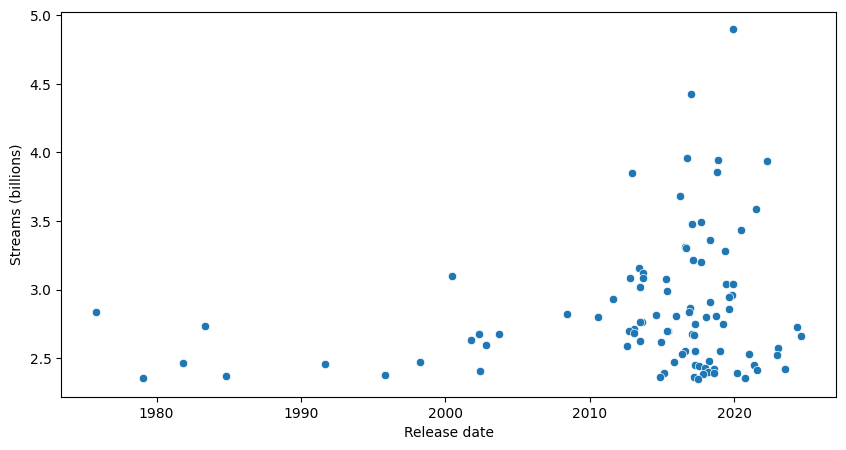

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(df,x="Release date",y="Streams (billions)")
